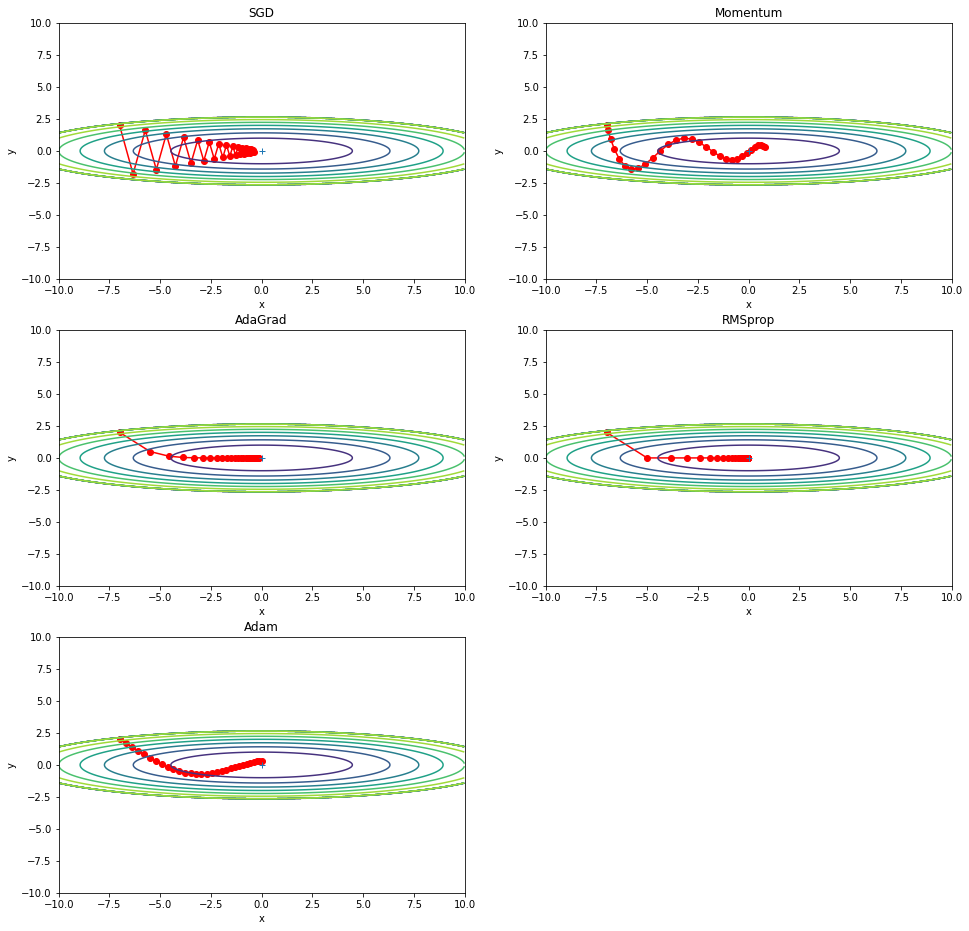

In [7]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2

# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (-2.5, 0)
# init_pos = (-2.0, 2.0)

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.393583915708124
Momentum:2.366048930618872
AdaGrad:2.185444195319375
Adam:2.140566828478308
===========iteration:100===========
SGD:1.447681964986662
Momentum:0.3048691146695319
AdaGrad:0.11433564443564988
Adam:0.24815676361857736
===========iteration:200===========
SGD:0.7726860474168705
Momentum:0.26650165751684496
AdaGrad:0.11369264449738384
Adam:0.1773057298644123
===========iteration:300===========
SGD:0.5633459717434002
Momentum:0.2097945290389926
AdaGrad:0.09776124676449348
Adam:0.18386865472585584
===========iteration:400===========
SGD:0.37308871258852394
Momentum:0.17267289163707145
AdaGrad:0.03576084917481442
Adam:0.10928295601912291
===========iteration:500===========
SGD:0.34745202430943506
Momentum:0.15316114122602847
AdaGrad:0.11268755541102332
Adam:0.13007711162163485
===========iteration:600===========
SGD:0.2745300035403867
Momentum:0.07338152419455071
AdaGrad:0.0302942190011782
Adam:0.04194502522605288
===========iteration:700=

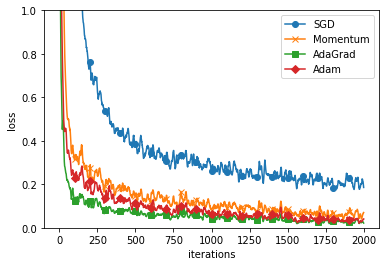

In [8]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### numpy random 함수

In [10]:
import numpy as np
a = np.random.randn(1000)
# print(a)
print(np.mean(a))
print(np.std(a))

0.0034424660945464466
1.0128102803775114


In [ ]:
import numpy as np
a = np.random.randn(1000,1000)*0.01
print(np.mean(a))
print(np.std(a))

In [1]:
import numpy as np
a = np.random.uniform(low=-1.0, high=1.0, size=(10,10))
print(np.mean(a))
print(np.std(a))

-0.02155318529204857
0.545973391887715


(1000, 100)


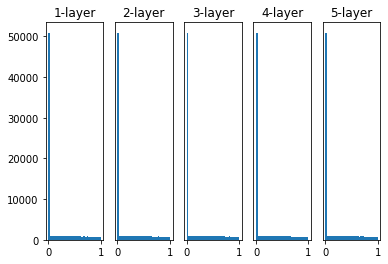

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

# test
#     w = np.random.uniform(low=-2.0, high=2.0, size=(100,100))  * np.sqrt(2.0 / node_num)  

    a = np.dot(x, w)
#     print(a)

    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
def  foo(a,b,c):
    print(a,b,c)
    
foo(a=1,c=2,b=3)

===========iteration:0===========
std=0.01:2.30253359321547
Xavier:2.3021171538303618
He:2.3561574938528285
===========iteration:100===========
std=0.01:2.3024042483213853
Xavier:2.244680442558802
He:1.573058014125396
===========iteration:200===========
std=0.01:2.3019812900498167
Xavier:2.141908655729365
He:0.8144273109187175
===========iteration:300===========
std=0.01:2.299764146342318
Xavier:1.7939913757577026
He:0.48886108361942365
===========iteration:400===========
std=0.01:2.302395268059378
Xavier:1.4244922026259212
He:0.44953922623262044
===========iteration:500===========
std=0.01:2.301602511112373
Xavier:0.9223941823318205
He:0.36570617084225604
===========iteration:600===========
std=0.01:2.3024400076441176
Xavier:0.6596656429325802
He:0.30646017923102375
===========iteration:700===========
std=0.01:2.300435507052215
Xavier:0.5381311566282878
He:0.3075555325858794
===========iteration:800===========
std=0.01:2.3055107919898323
Xavier:0.45841394551582126
He:0.258297146445110

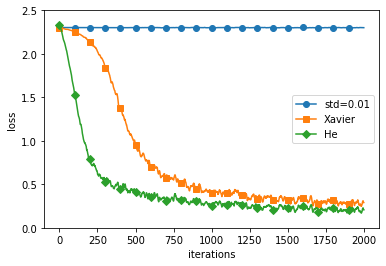

In [2]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 배치 정규화 테스트

In [3]:
x1 = np.array([1000, 3000, 2000, 5000, 7000])
print(x1)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(out)

[1000 3000 2000 5000 7000]
[-1.2070197  -0.27854301 -0.74278135  0.64993368  1.57841037]


In [4]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))

-3.637978807091713e-17
0.9999999999999999


In [5]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))
gamma = 2
beta = 1
y = out*gamma + beta
print(np.mean(y))
print(np.std(y))

-3.637978807091713e-17
0.9999999999999999
1.0
1.9999999999999998


In [6]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.05523292187163964
W3:0.0
b3:1.7990402263745597e-07


<Figure size 1152x1152 with 0 Axes>

In [10]:
a = np.logspace(0, -4, num=5, base=2)
a

array([1.    , 0.5   , 0.25  , 0.125 , 0.0625])

In [8]:
a = np.logspace(0, 4, num=5, base=10)
a

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

============== 1/16 ==============
epoch:0 | 0.105 - 0.086
epoch:1 | 0.097 - 0.085


D:\올인원과정\밑바닥시리즈_1\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\올인원과정\밑바닥시리즈_1\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\jikim\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:2 | 0.097 - 0.118
epoch:3 | 0.097 - 0.141
epoch:4 | 0.097 - 0.144
epoch:5 | 0.097 - 0.161
epoch:6 | 0.097 - 0.184
epoch:7 | 0.097 - 0.191
epoch:8 | 0.097 - 0.199
epoch:9 | 0.097 - 0.228
epoch:10 | 0.097 - 0.233
epoch:11 | 0.097 - 0.263
epoch:12 | 0.097 - 0.265
epoch:13 | 0.097 - 0.278
epoch:14 | 0.097 - 0.291
epoch:15 | 0.097 - 0.306
epoch:16 | 0.097 - 0.315
epoch:17 | 0.097 - 0.334
epoch:18 | 0.097 - 0.346


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.36
============== 2/16 ==============
epoch:0 | 0.093 - 0.084
epoch:1 | 0.097 - 0.133


D:\올인원과정\밑바닥시리즈_1\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\올인원과정\밑바닥시리즈_1\ch06\..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\올인원과정\밑바닥시리즈_1\ch06\..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:2 | 0.097 - 0.145
epoch:3 | 0.097 - 0.165
epoch:4 | 0.097 - 0.181
epoch:5 | 0.097 - 0.206
epoch:6 | 0.097 - 0.223
epoch:7 | 0.097 - 0.252
epoch:8 | 0.097 - 0.269
epoch:9 | 0.097 - 0.299
epoch:10 | 0.097 - 0.31
epoch:11 | 0.097 - 0.334
epoch:12 | 0.097 - 0.358
epoch:13 | 0.097 - 0.37
epoch:14 | 0.097 - 0.396
epoch:15 | 0.097 - 0.404
epoch:16 | 0.097 - 0.434
epoch:17 | 0.097 - 0.46
epoch:18 | 0.097 - 0.471


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.485
============== 3/16 ==============
epoch:0 | 0.099 - 0.097
epoch:1 | 0.355 - 0.091
epoch:2 | 0.474 - 0.129
epoch:3 | 0.568 - 0.179
epoch:4 | 0.612 - 0.231
epoch:5 | 0.703 - 0.262
epoch:6 | 0.729 - 0.298
epoch:7 | 0.78 - 0.335
epoch:8 | 0.82 - 0.369
epoch:9 | 0.832 - 0.388
epoch:10 | 0.84 - 0.419
epoch:11 | 0.871 - 0.446
epoch:12 | 0.898 - 0.474
epoch:13 | 0.91 - 0.494
epoch:14 | 0.928 - 0.524
epoch:15 | 0.95 - 0.549
epoch:16 | 0.962 - 0.566
epoch:17 | 0.963 - 0.57
epoch:18 | 0.971 - 0.592


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.974 - 0.607
============== 4/16 ==============
epoch:0 | 0.071 - 0.095
epoch:1 | 0.219 - 0.093
epoch:2 | 0.381 - 0.146
epoch:3 | 0.499 - 0.23
epoch:4 | 0.582 - 0.321
epoch:5 | 0.638 - 0.382
epoch:6 | 0.676 - 0.434
epoch:7 | 0.704 - 0.488
epoch:8 | 0.73 - 0.543
epoch:9 | 0.753 - 0.586
epoch:10 | 0.786 - 0.607
epoch:11 | 0.796 - 0.645
epoch:12 | 0.817 - 0.667
epoch:13 | 0.827 - 0.696
epoch:14 | 0.846 - 0.716
epoch:15 | 0.851 - 0.735
epoch:16 | 0.864 - 0.744
epoch:17 | 0.87 - 0.762
epoch:18 | 0.881 - 0.776


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.893 - 0.79
============== 5/16 ==============
epoch:0 | 0.157 - 0.107
epoch:1 | 0.165 - 0.107
epoch:2 | 0.181 - 0.282
epoch:3 | 0.208 - 0.42
epoch:4 | 0.207 - 0.492
epoch:5 | 0.219 - 0.552
epoch:6 | 0.227 - 0.62
epoch:7 | 0.24 - 0.664
epoch:8 | 0.247 - 0.701
epoch:9 | 0.261 - 0.737
epoch:10 | 0.268 - 0.755
epoch:11 | 0.274 - 0.776
epoch:12 | 0.281 - 0.806
epoch:13 | 0.293 - 0.829
epoch:14 | 0.296 - 0.839
epoch:15 | 0.311 - 0.856
epoch:16 | 0.319 - 0.871
epoch:17 | 0.317 - 0.883
epoch:18 | 0.318 - 0.89


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.318 - 0.894
============== 6/16 ==============
epoch:0 | 0.09 - 0.089
epoch:1 | 0.125 - 0.137
epoch:2 | 0.117 - 0.399
epoch:3 | 0.117 - 0.546
epoch:4 | 0.118 - 0.624
epoch:5 | 0.117 - 0.694
epoch:6 | 0.117 - 0.747
epoch:7 | 0.117 - 0.779
epoch:8 | 0.117 - 0.806
epoch:9 | 0.117 - 0.836
epoch:10 | 0.117 - 0.855
epoch:11 | 0.117 - 0.868
epoch:12 | 0.119 - 0.888
epoch:13 | 0.117 - 0.897
epoch:14 | 0.119 - 0.906
epoch:15 | 0.119 - 0.915
epoch:16 | 0.117 - 0.922
epoch:17 | 0.117 - 0.928
epoch:18 | 0.117 - 0.935


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.946
============== 7/16 ==============
epoch:0 | 0.116 - 0.08
epoch:1 | 0.117 - 0.349
epoch:2 | 0.117 - 0.608
epoch:3 | 0.117 - 0.691
epoch:4 | 0.117 - 0.737
epoch:5 | 0.117 - 0.774
epoch:6 | 0.117 - 0.802
epoch:7 | 0.117 - 0.834
epoch:8 | 0.117 - 0.852
epoch:9 | 0.116 - 0.874
epoch:10 | 0.207 - 0.885
epoch:11 | 0.117 - 0.902
epoch:12 | 0.117 - 0.917
epoch:13 | 0.117 - 0.927
epoch:14 | 0.117 - 0.938
epoch:15 | 0.117 - 0.951
epoch:16 | 0.117 - 0.957
epoch:17 | 0.117 - 0.973
epoch:18 | 0.117 - 0.976


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.981
============== 8/16 ==============
epoch:0 | 0.117 - 0.13
epoch:1 | 0.117 - 0.403
epoch:2 | 0.117 - 0.657
epoch:3 | 0.116 - 0.775
epoch:4 | 0.117 - 0.809
epoch:5 | 0.117 - 0.832
epoch:6 | 0.117 - 0.871
epoch:7 | 0.117 - 0.899
epoch:8 | 0.117 - 0.943
epoch:9 | 0.117 - 0.962
epoch:10 | 0.117 - 0.981
epoch:11 | 0.117 - 0.983
epoch:12 | 0.117 - 0.988
epoch:13 | 0.117 - 0.989
epoch:14 | 0.117 - 0.991
epoch:15 | 0.117 - 0.991
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.995
epoch:18 | 0.117 - 0.995


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.995
============== 9/16 ==============
epoch:0 | 0.099 - 0.132
epoch:1 | 0.105 - 0.55
epoch:2 | 0.116 - 0.705
epoch:3 | 0.116 - 0.777
epoch:4 | 0.117 - 0.868
epoch:5 | 0.117 - 0.932
epoch:6 | 0.117 - 0.956
epoch:7 | 0.117 - 0.974
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.989
epoch:10 | 0.117 - 0.992
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.117 - 0.137
epoch:1 | 0.105 - 0.675
epoch:2 | 0.099 - 0.776
epoch:3 | 0.116 - 0.818
epoch:4 | 0.116 - 0.835
epoch:5 | 0.117 - 0.875
epoch:6 | 0.117 - 0.887
epoch:7 | 0.117 - 0.894
epoch:8 | 0.117 - 0.931
epoch:9 | 0.117 - 0.977
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.972
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.093 - 0.125
epoch:1 | 0.116 - 0.551
epoch:2 | 0.116 - 0.594
epoch:3 | 0.116 - 0.622
epoch:4 | 0.116 - 0.687
epoch:5 | 0.116 - 0.692
epoch:6 | 0.116 - 0.694
epoch:7 | 0.116 - 0.738
epoch:8 | 0.116 - 0.785
epoch:9 | 0.116 - 0.803
epoch:10 | 0.116 - 0.855
epoch:11 | 0.116 - 0.878
epoch:12 | 0.116 - 0.881
epoch:13 | 0.116 - 0.885
epoch:14 | 0.116 - 0.885
epoch:15 | 0.116 - 0.914
epoch:16 | 0.117 - 0.975
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.992


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.993
============== 12/16 ==============
epoch:0 | 0.105 - 0.144
epoch:1 | 0.116 - 0.146
epoch:2 | 0.116 - 0.639
epoch:3 | 0.116 - 0.599
epoch:4 | 0.116 - 0.656
epoch:5 | 0.116 - 0.681
epoch:6 | 0.116 - 0.695
epoch:7 | 0.117 - 0.704
epoch:8 | 0.117 - 0.708
epoch:9 | 0.117 - 0.715
epoch:10 | 0.117 - 0.701
epoch:11 | 0.117 - 0.793
epoch:12 | 0.117 - 0.813
epoch:13 | 0.117 - 0.81
epoch:14 | 0.117 - 0.798
epoch:15 | 0.117 - 0.8
epoch:16 | 0.117 - 0.815
epoch:17 | 0.117 - 0.811
epoch:18 | 0.117 - 0.816


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.817
============== 13/16 ==============
epoch:0 | 0.117 - 0.12
epoch:1 | 0.117 - 0.351
epoch:2 | 0.117 - 0.522
epoch:3 | 0.117 - 0.564
epoch:4 | 0.117 - 0.669
epoch:5 | 0.117 - 0.637
epoch:6 | 0.117 - 0.664
epoch:7 | 0.117 - 0.674
epoch:8 | 0.117 - 0.688
epoch:9 | 0.117 - 0.694
epoch:10 | 0.117 - 0.69
epoch:11 | 0.117 - 0.673
epoch:12 | 0.117 - 0.689
epoch:13 | 0.117 - 0.705
epoch:14 | 0.117 - 0.698
epoch:15 | 0.117 - 0.708
epoch:16 | 0.117 - 0.702
epoch:17 | 0.117 - 0.714
epoch:18 | 0.117 - 0.713


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.714
============== 14/16 ==============
epoch:0 | 0.087 - 0.167
epoch:1 | 0.117 - 0.302
epoch:2 | 0.117 - 0.376
epoch:3 | 0.116 - 0.394
epoch:4 | 0.116 - 0.453
epoch:5 | 0.116 - 0.533
epoch:6 | 0.116 - 0.563
epoch:7 | 0.117 - 0.582
epoch:8 | 0.117 - 0.579
epoch:9 | 0.116 - 0.564
epoch:10 | 0.116 - 0.59
epoch:11 | 0.116 - 0.538
epoch:12 | 0.116 - 0.594
epoch:13 | 0.116 - 0.603
epoch:14 | 0.116 - 0.593
epoch:15 | 0.116 - 0.606
epoch:16 | 0.116 - 0.613
epoch:17 | 0.116 - 0.614
epoch:18 | 0.116 - 0.611


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.611
============== 15/16 ==============
epoch:0 | 0.117 - 0.11
epoch:1 | 0.105 - 0.359
epoch:2 | 0.117 - 0.277
epoch:3 | 0.117 - 0.411
epoch:4 | 0.117 - 0.423
epoch:5 | 0.117 - 0.379
epoch:6 | 0.117 - 0.427
epoch:7 | 0.117 - 0.43
epoch:8 | 0.117 - 0.427
epoch:9 | 0.117 - 0.431
epoch:10 | 0.117 - 0.434
epoch:11 | 0.117 - 0.433
epoch:12 | 0.117 - 0.464
epoch:13 | 0.117 - 0.459
epoch:14 | 0.117 - 0.452
epoch:15 | 0.117 - 0.513
epoch:16 | 0.117 - 0.518
epoch:17 | 0.117 - 0.519
epoch:18 | 0.117 - 0.521


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.534
============== 16/16 ==============
epoch:0 | 0.105 - 0.135
epoch:1 | 0.117 - 0.291
epoch:2 | 0.117 - 0.304
epoch:3 | 0.117 - 0.349
epoch:4 | 0.117 - 0.363
epoch:5 | 0.117 - 0.405
epoch:6 | 0.117 - 0.386
epoch:7 | 0.117 - 0.402
epoch:8 | 0.117 - 0.415
epoch:9 | 0.116 - 0.415
epoch:10 | 0.116 - 0.433
epoch:11 | 0.116 - 0.414
epoch:12 | 0.116 - 0.416
epoch:13 | 0.116 - 0.441
epoch:14 | 0.117 - 0.413
epoch:15 | 0.117 - 0.41
epoch:16 | 0.116 - 0.432
epoch:17 | 0.117 - 0.383
epoch:18 | 0.117 - 0.432
epoch:19 | 0.116 - 0.431


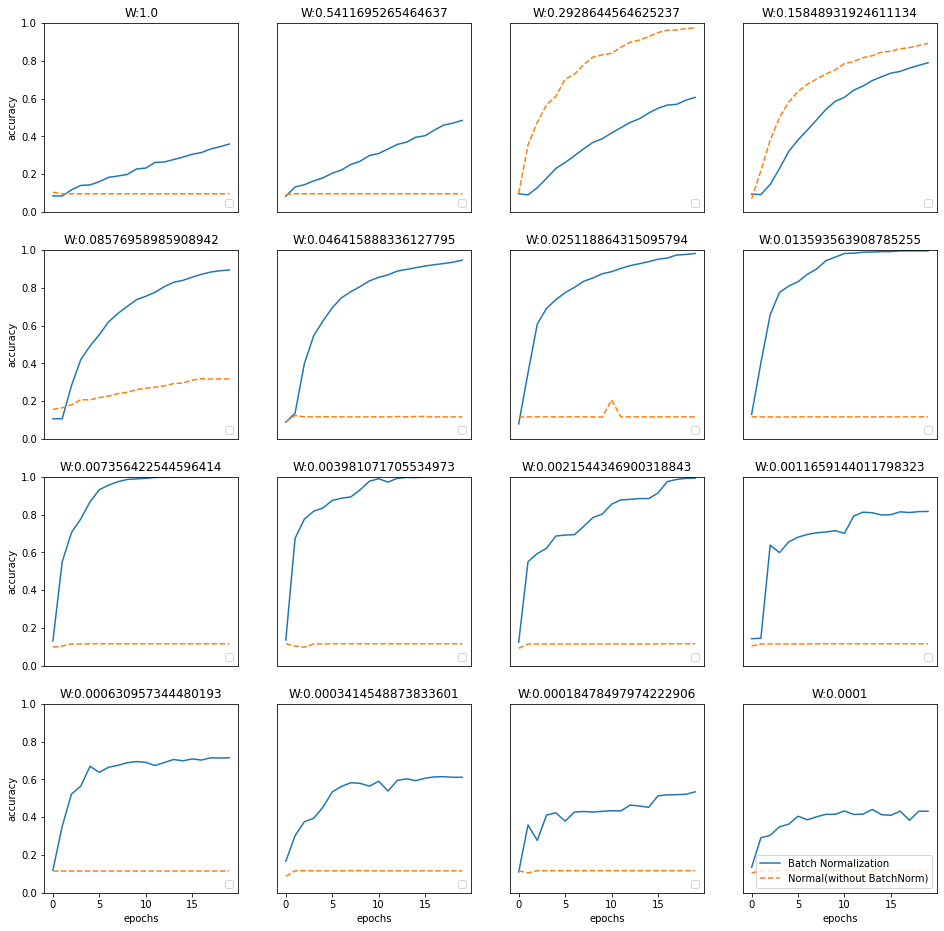

In [7]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.06666666666666667, test acc:0.0746
epoch:1, train acc:0.08, test acc:0.0872
epoch:2, train acc:0.10333333333333333, test acc:0.1044
epoch:3, train acc:0.13666666666666666, test acc:0.1121
epoch:4, train acc:0.15, test acc:0.1227
epoch:5, train acc:0.17333333333333334, test acc:0.1305
epoch:6, train acc:0.21, test acc:0.1519
epoch:7, train acc:0.25333333333333335, test acc:0.1658
epoch:8, train acc:0.25666666666666665, test acc:0.1725
epoch:9, train acc:0.27, test acc:0.1816
epoch:10, train acc:0.2833333333333333, test acc:0.1891
epoch:11, train acc:0.3, test acc:0.2
epoch:12, train acc:0.31333333333333335, test acc:0.2035
epoch:13, train acc:0.34, test acc:0.2245
epoch:14, train acc:0.36, test acc:0.2345
epoch:15, train acc:0.43333333333333335, test acc:0.2704
epoch:16, train acc:0.44, test acc:0.2668
epoch:17, train acc:0.46, test acc:0.2981
epoch:18, train acc:0.49666666666666665, test acc:0.3267
epoch:19, train acc:0.53, test acc:0.3551
epoch:20, train acc:0.55,

epoch:163, train acc:0.9033333333333333, test acc:0.7216
epoch:164, train acc:0.9133333333333333, test acc:0.7211
epoch:165, train acc:0.9133333333333333, test acc:0.7188
epoch:166, train acc:0.9133333333333333, test acc:0.7253
epoch:167, train acc:0.91, test acc:0.7259
epoch:168, train acc:0.91, test acc:0.7314
epoch:169, train acc:0.91, test acc:0.7227
epoch:170, train acc:0.9066666666666666, test acc:0.7154
epoch:171, train acc:0.9133333333333333, test acc:0.72
epoch:172, train acc:0.93, test acc:0.7269
epoch:173, train acc:0.9033333333333333, test acc:0.713
epoch:174, train acc:0.9166666666666666, test acc:0.7244
epoch:175, train acc:0.9, test acc:0.7183
epoch:176, train acc:0.9166666666666666, test acc:0.7267
epoch:177, train acc:0.9066666666666666, test acc:0.721
epoch:178, train acc:0.9133333333333333, test acc:0.7163
epoch:179, train acc:0.92, test acc:0.7182
epoch:180, train acc:0.9166666666666666, test acc:0.7186
epoch:181, train acc:0.91, test acc:0.717
epoch:182, train acc:

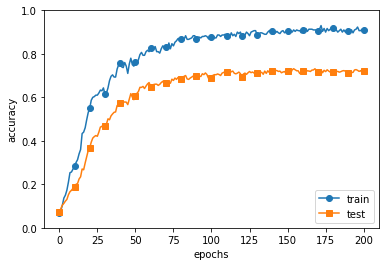

In [12]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

#### tuple 언패킹

In [17]:
a = 1,2
print(type(a), a)

# a,b = (1,2)
# print(type(a), a)
# print(type(b), b)

<class 'tuple'> (1, 2)


In [19]:
def foo():
    return 1,2

c = foo()
print(c)

c,d = foo()
print(c,d)

(1, 2)
1 2


In [22]:
def foo(a):
    print(a)

foo(1)

def foo(a,b):
    print(a,b)

c = (1,2)
foo(*c)

1
1 2


In [31]:
import numpy as np
x = (600,500)
# x = (6,5)
print(x)
# print(*x)
a = np.random.rand(*x)  # np.random.rand(6,5)
print(np.mean(a))
print(np.max(a))
print(np.min(a))
# print(a)

(600, 500)
0.49963966911671925
0.9999994594421444
1.9493616720822615e-07


In [59]:
import numpy as np
x = np.arange(1,31).reshape((6,5))
print(x)
print(x.shape)
mask = np.random.rand(*x.shape)
print(mask)
mask = mask > 0.2
print(mask)
print(mask.shape)
# # print(np.mean(mask))
print(x * mask)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
(6, 5)
[[0.15365562 0.14500992 0.08566954 0.70852248 0.16750815]
 [0.24100229 0.88387867 0.96066981 0.10902985 0.71762608]
 [0.85173193 0.58066543 0.66374021 0.59327255 0.72851501]
 [0.59444284 0.15789704 0.06193438 0.02878416 0.70355776]
 [0.79006668 0.4550076  0.95770862 0.8726452  0.57475602]
 [0.38096398 0.30539021 0.8432978  0.20202089 0.84010284]]
[[False False False  True False]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True False False False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
(6, 5)
[[ 0  0  0  4  0]
 [ 6  7  8  0 10]
 [11 12 13 14 15]
 [16  0  0  0 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


train loss:2.3162418067125206
=== epoch:1, train acc:0.07333333333333333, test acc:0.091 ===
train loss:2.3272148271157302
train loss:2.301966102636857
train loss:2.317056017942777
=== epoch:2, train acc:0.06666666666666667, test acc:0.0918 ===
train loss:2.318894735702442
train loss:2.323617400573484
train loss:2.311681768457015
=== epoch:3, train acc:0.07, test acc:0.0919 ===
train loss:2.3381040207629202
train loss:2.3167399298308893
train loss:2.3210566410935245
=== epoch:4, train acc:0.07, test acc:0.0922 ===
train loss:2.3212435827523334
train loss:2.3093656094037605
train loss:2.311326950103271
=== epoch:5, train acc:0.06333333333333334, test acc:0.0911 ===
train loss:2.312006092924235
train loss:2.3208898059948657
train loss:2.3149452755574322
=== epoch:6, train acc:0.06, test acc:0.0877 ===
train loss:2.312039868684826
train loss:2.305084241783527
train loss:2.3029699268134536
=== epoch:7, train acc:0.06333333333333334, test acc:0.0882 ===
train loss:2.2996980388727177
train l

=== epoch:58, train acc:0.3566666666666667, test acc:0.2529 ===
train loss:2.262346106176049
train loss:2.2583316165264957
train loss:2.2545642887257578
=== epoch:59, train acc:0.36, test acc:0.2574 ===
train loss:2.2569991979480846
train loss:2.2581167969311386
train loss:2.2536929539184523
=== epoch:60, train acc:0.3566666666666667, test acc:0.2586 ===
train loss:2.254717061114412
train loss:2.257910837660218
train loss:2.2599034507581997
=== epoch:61, train acc:0.3466666666666667, test acc:0.2609 ===
train loss:2.2560407069515205
train loss:2.2444564933555666
train loss:2.2553325068447037
=== epoch:62, train acc:0.36, test acc:0.2647 ===
train loss:2.253789545075616
train loss:2.238164145976693
train loss:2.252132044308736
=== epoch:63, train acc:0.36333333333333334, test acc:0.2677 ===
train loss:2.238245920021076
train loss:2.258002424037272
train loss:2.2653676847495814
=== epoch:64, train acc:0.3566666666666667, test acc:0.2702 ===
train loss:2.259421345125952
train loss:2.26371

=== epoch:114, train acc:0.4166666666666667, test acc:0.3228 ===
train loss:2.1825878371126843
train loss:2.1697343305167625
train loss:2.1566479988610574
=== epoch:115, train acc:0.41333333333333333, test acc:0.3259 ===
train loss:2.1833184885318984
train loss:2.1710799999019836
train loss:2.16801168921193
=== epoch:116, train acc:0.42, test acc:0.3269 ===
train loss:2.176690822999954
train loss:2.1609760673468132
train loss:2.1893291233649124
=== epoch:117, train acc:0.42, test acc:0.3311 ===
train loss:2.1623645055976546
train loss:2.1704286284392866
train loss:2.1877552894957892
=== epoch:118, train acc:0.43, test acc:0.3372 ===
train loss:2.1895842910203673
train loss:2.1558087483553847
train loss:2.178100782415886
=== epoch:119, train acc:0.43333333333333335, test acc:0.3378 ===
train loss:2.198547444021422
train loss:2.1587403039649358
train loss:2.1567147406630722
=== epoch:120, train acc:0.43333333333333335, test acc:0.3365 ===
train loss:2.1865267927693623
train loss:2.138439

=== epoch:170, train acc:0.48333333333333334, test acc:0.3844 ===
train loss:2.055043425890065
train loss:1.9612040077550024
train loss:1.9106813003736005
=== epoch:171, train acc:0.48, test acc:0.3866 ===
train loss:1.985478587671189
train loss:2.026443308259793
train loss:2.0119095129046243
=== epoch:172, train acc:0.5066666666666667, test acc:0.3918 ===
train loss:1.9595667158789547
train loss:1.9934074449145749
train loss:2.033862759304289
=== epoch:173, train acc:0.5033333333333333, test acc:0.3927 ===
train loss:1.9783790478512313
train loss:1.9868546866004226
train loss:2.0276536562103202
=== epoch:174, train acc:0.51, test acc:0.3938 ===
train loss:1.9453771367335904
train loss:1.9498847655369806
train loss:1.972773651524941
=== epoch:175, train acc:0.5033333333333333, test acc:0.3888 ===
train loss:1.9883886085972287
train loss:2.0720087347634375
train loss:1.9019900143153359
=== epoch:176, train acc:0.49, test acc:0.3916 ===
train loss:1.9158140766198206
train loss:1.96188424

=== epoch:226, train acc:0.6066666666666667, test acc:0.4824 ===
train loss:1.558199377002579
train loss:1.5690691874500997
train loss:1.680017308254114
=== epoch:227, train acc:0.61, test acc:0.4822 ===
train loss:1.5844038411981445
train loss:1.6025792932339076
train loss:1.7455545358511733
=== epoch:228, train acc:0.6133333333333333, test acc:0.484 ===
train loss:1.8044338356856553
train loss:1.5815263261062567
train loss:1.5668138663771172
=== epoch:229, train acc:0.6, test acc:0.4834 ===
train loss:1.64565446449082
train loss:1.5763686826010537
train loss:1.6061969021728018
=== epoch:230, train acc:0.61, test acc:0.4805 ===
train loss:1.6106844925837518
train loss:1.6174153817567538
train loss:1.5949509810581872
=== epoch:231, train acc:0.61, test acc:0.4831 ===
train loss:1.5893836003795732
train loss:1.6276461911019047
train loss:1.6289368422284705
=== epoch:232, train acc:0.61, test acc:0.4844 ===
train loss:1.630546268021658
train loss:1.6220216444808262
train loss:1.574094166

=== epoch:282, train acc:0.6666666666666666, test acc:0.5224 ===
train loss:1.1797241505703988
train loss:1.272939399890068
train loss:1.2329683366957342
=== epoch:283, train acc:0.67, test acc:0.525 ===
train loss:1.2480152150523312
train loss:1.332319369048017
train loss:1.3212181262818128
=== epoch:284, train acc:0.6733333333333333, test acc:0.5237 ===
train loss:1.269109281576891
train loss:1.2304604863651452
train loss:1.2283206000974114
=== epoch:285, train acc:0.67, test acc:0.5238 ===
train loss:1.3194617871845398
train loss:1.242728914844285
train loss:1.2721227630821683
=== epoch:286, train acc:0.6833333333333333, test acc:0.5265 ===
train loss:1.3246589468594159
train loss:1.2126366322323756
train loss:1.2524647119314911
=== epoch:287, train acc:0.6733333333333333, test acc:0.5292 ===
train loss:1.3564932676612074
train loss:1.161673968290396
train loss:1.2646739065713968
=== epoch:288, train acc:0.6833333333333333, test acc:0.5318 ===
train loss:1.3937755669115786
train los

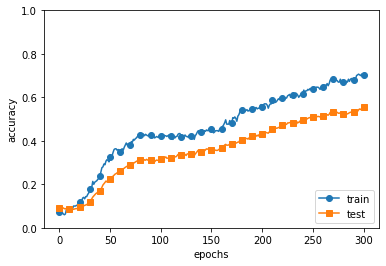

In [61]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0